### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


Successfully connected to the database


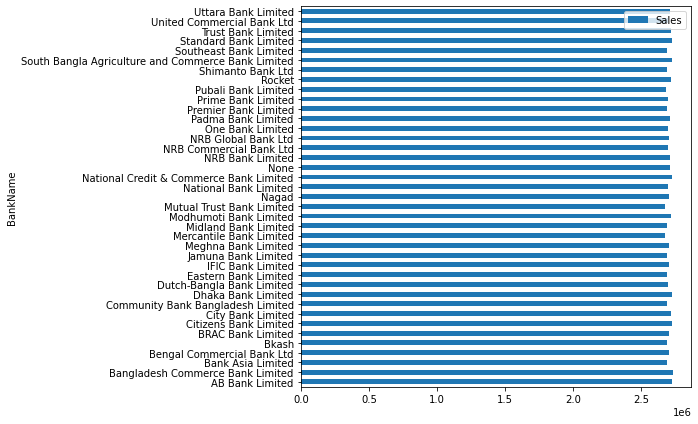

In [63]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT tr.bank_name, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"GROUP BY tr.bank_name "\
"ORDER BY tr.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['BankName', 'Sales'])
df = df.dropna()
df['Sales'] = df['Sales'].astype('float64')
fig = df.plot.barh(x='BankName', y='Sales', figsize=(7,7), rot=0)


C:\Users\Nayan\AppData\Local\Temp\ipykernel_5536\2785654912.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


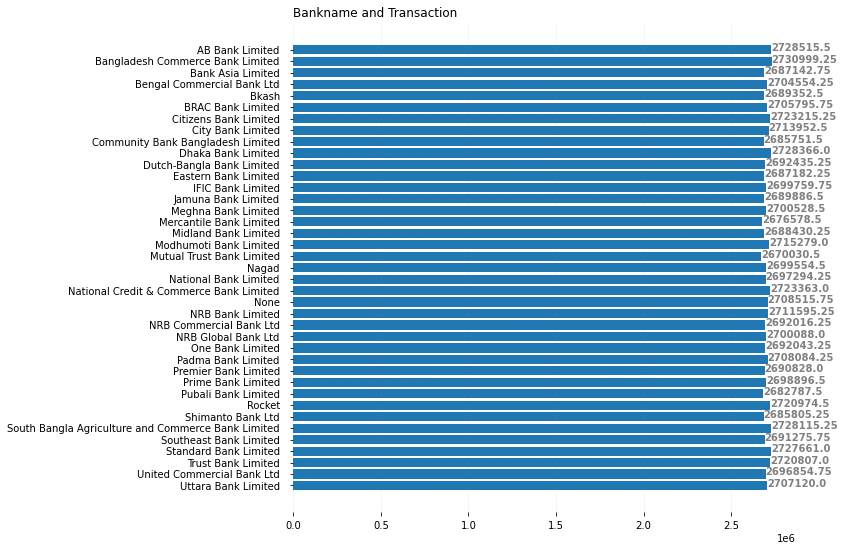

In [64]:
x = df['BankName']
y = df['Sales']

# Figure Size
fig, ax = plt.subplots(figsize =(9, 9))

# Horizontal Bar Plot
ax.barh(x, y, linewidth=10)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# # Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
            str(round((i.get_width()), 2)),
            fontsize = 10, fontweight ='bold', color ='grey')

# Add Plot Title
ax.set_title('Bankname and Transaction', loc ='left', )

# Show Plot
plt.show()


In [83]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT tim.year, tim.month, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"GROUP BY tim.year, tim.month " \
"ORDER BY tim.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Year','Month', 'Sales'])
df
# df = df.dropna()
# df['Sales'] = df['Sales'].astype('float64')
# fig = df.plot.bar(x='Month', y='Sales', figsize=(10,7), rot=0)


Successfully connected to the database


,Year,Month,Sales
0,2014,1,496549.25
1,2014,2,1122547.00
2,2014,3,1262435.75
3,2014,4,1245142.50
4,2014,5,1268770.50
...,...,...,...
80,2020,9,1232639.75
81,2020,10,1319655.75
82,2020,11,1200248.75
83,2020,12,1346884.75


Text(0, 0.5, 'Total Sales in each month')

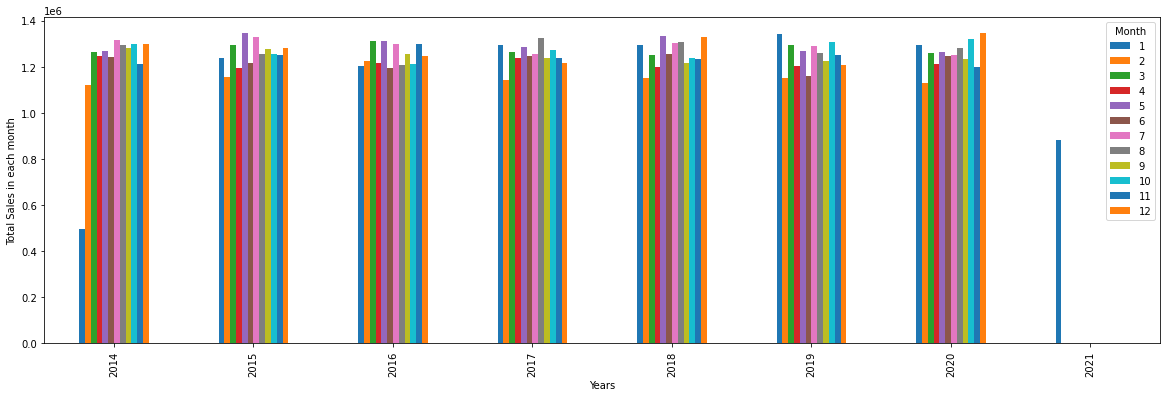

In [84]:
df_pivot = pd.pivot_table(df, values="Sales", index="Year", columns="Month")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 6)

ax.set_xlabel("Years")
ax.set_ylabel("Total Sales in each month")


Successfully connected to the database


C:\Users\Nayan\Desktop\myenv\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


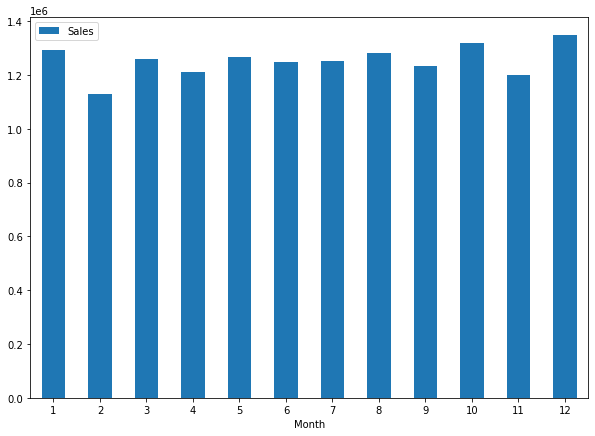

In [89]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT tim.year,tim.month, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"WHERE tim.year='2020' " \
"GROUP BY tim.year,tim.month "\
"ORDER BY tim.year "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Year','Month', 'Sales'])
df
# df = df.dropna()
df['Sales'] = df['Sales'].astype('float64')
df['Month'] = df['Month'].astype('object')
fig = df.plot.bar(x='Month', y='Sales', figsize=(10,7), rot=0)


In [90]:
df.dtypes

Year       int64
Month     object
Sales    float64
dtype: object

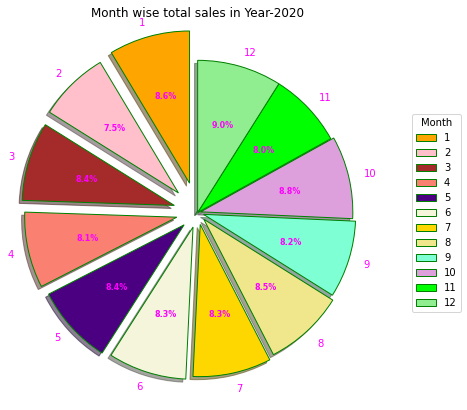

In [112]:
x = df.Month
y = df.Sales
# Creating explode data
explode = (0.2, 0.18, 0.16, 0.14, 0.12, 0.1, 0.08, 0.06, 0.04 ,0.02 ,0.0 ,0.0)

# Creating color parameters
colors = ( "orange", "pink", "brown","salmon", "indigo", "beige", "gold", "khaki", "aquamarine", "plum", "lime", "lightgreen")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, y),
                                  explode = explode,
                                  labels = x,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, x,
          title ="Month",
          loc ="center left",
          bbox_to_anchor =(1.05, 0, 0.8, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Month wise total sales in Year-2020")

# show plot
plt.show()

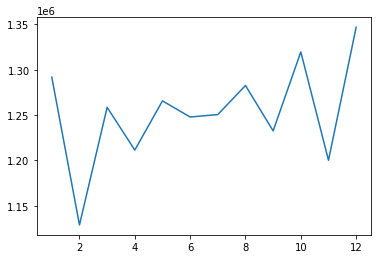

In [113]:
plt.plot(x, y) 
plt.show() 